Uses this to Scroll through Facebook and Instagram and returns results.

In [1]:
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys
# To effectively navigate through Facebook, it is important that you "allow notifications" for Facbook on your computer or else your Chrome browser will continually ask you to give notifications permission, 
#and you will have to do this manually, interrupting the running of the chromebrowser
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs", prefs)
browser = webdriver.Chrome(executable_path='/Users/zoewiles/Downloads/chromedriver',
                         chrome_options=chrome_options)

In [2]:
# access the element of the input text box
browser.get('https://www.facebook.com')
inputBox = browser.find_element_by_name("email")
# send my email
inputBox.send_keys("zrwiles@gmail.com")

# access the element of the input text box
inputBox = browser.find_element_by_name("pass")
# send my email
inputBox.send_keys("Ghana#3215")
inputBox = browser.find_element_by_id('loginbutton').click()

rawHtml = browser.page_source


In [3]:
ads = set()
adDict = {}
i = 0
lastHeight = browser.execute_script("return document.body.scrollHeight")
while True:
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    for ad in browser.find_elements_by_class_name("userContentWrapper"):
        a = ad.find_element_by_tag_name("a")
        
        link = a.get_attribute("href").split('?')[0]
        #if link != "https://www.facebook.com/profile.php" and link != 'https://www.facebook.com/Alsamoie/'
        if link.find("sponsor") and link != "https://www.facebook.com/#" and link != "https://www.facebook.com/profile.php":
            if link not in ads:
                ads.add(link)
                adDict[link] = 1
            else:
                adDict[link] += 1
    newHeight = browser.execute_script("return document.body.scrollHeight")
    #if newHeight == lastHeight or len(commenters) > 5:
    if len(ads) > 10:
        break
    lastHeight = newHeight
print ads
print adDict


set([u'https://www.facebook.com/madebygoogle/', u'https://www.facebook.com/danielle.espling', u'https://www.facebook.com/clickhole/', u'https://www.facebook.com/TVshowentertainment/', u'https://www.facebook.com/WhisperApp/', u'https://www.facebook.com/ellemagazine/', u'https://www.facebook.com/sephora/', u'https://www.facebook.com/Female-144104129680859/', u'https://www.facebook.com/emily.cheng.7946', u'https://www.facebook.com/thrillistfoodanddrink/', u'https://www.facebook.com/UltaBeauty/'])
{u'https://www.facebook.com/madebygoogle/': 6, u'https://www.facebook.com/danielle.espling': 9, u'https://www.facebook.com/clickhole/': 2, u'https://www.facebook.com/TVshowentertainment/': 2, u'https://www.facebook.com/WhisperApp/': 8, u'https://www.facebook.com/ellemagazine/': 4, u'https://www.facebook.com/sephora/': 9, u'https://www.facebook.com/Female-144104129680859/': 6, u'https://www.facebook.com/emily.cheng.7946': 4, u'https://www.facebook.com/thrillistfoodanddrink/': 7, u'https://www.face

In [4]:
for key, value in sorted(adDict.iteritems(), key=lambda (k,v): (v,k)):
    print "%s: %s" % (key, value)

https://www.facebook.com/UltaBeauty/: 1
https://www.facebook.com/TVshowentertainment/: 2
https://www.facebook.com/clickhole/: 2
https://www.facebook.com/ellemagazine/: 4
https://www.facebook.com/emily.cheng.7946: 4
https://www.facebook.com/Female-144104129680859/: 6
https://www.facebook.com/madebygoogle/: 6
https://www.facebook.com/thrillistfoodanddrink/: 7
https://www.facebook.com/WhisperApp/: 8
https://www.facebook.com/danielle.espling: 9
https://www.facebook.com/sephora/: 9


Data Visualizations


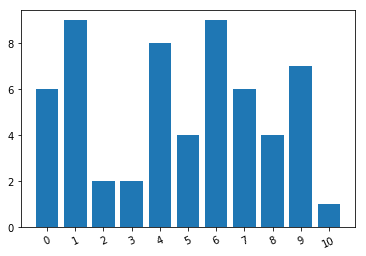

In [5]:
import numpy as np
import matplotlib.pyplot as plt
d = adDict
plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), rotation=25)
plt.show()